<a href="https://colab.research.google.com/github/Slontus/data/blob/main/bli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/Slontus/data/main/OECD_bli.csv"
oecd_bli_df = pd.read_csv(url)
oecd_bli_df = oecd_bli_df[oecd_bli_df['INEQUALITY'] == 'TOT']
oecd_bli_df.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.4,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.8,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN


In [22]:
url_gdp = "https://raw.githubusercontent.com/Slontus/data/main/gdp-per-capita-worldbank.csv"
gdp = pd.read_csv(url_gdp)
gdp2020 = gdp[gdp['Year'] == 2020]
gdp2020 = gdp2020.drop(['Year', "Code"], axis=1)
gdp2020.columns = ["Country", "GDP per cap (USD)"]
gdp2020.set_index("Country", inplace=True)
gdp2020.head()


,GDP per cap (USD)
Country,
Afghanistan,1970.560181
Albania,13191.952148
Algeria,10735.382812
Angola,6110.274414
Antigua and Barbuda,17293.302734


In [23]:
oecd_bli = pd.pivot_table(oecd_bli_df,  index="Country", columns = "Indicator", values = "Value")


print(oecd_bli.info())
oecd_bli.head()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Australia to United States
Data columns (total 24 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Air pollution                                      42 non-null     float64
 1   Dwellings without basic facilities                 39 non-null     float64
 2   Educational attainment                             41 non-null     float64
 3   Employees working very long hours                  40 non-null     float64
 4   Employment rate                                    42 non-null     float64
 5   Feeling safe walking alone at night                42 non-null     float64
 6   Homicide rate                                      42 non-null     float64
 7   Household net adjusted disposable income           36 non-null     float64
 8   Household net wealth                               30 non-null     float64
 9 

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,6.7,NaN,84.0,12.5,73.0,67.0,0.9,37433.0,528768.0,19.4,...,55206.0,93.0,NaN,85.0,2.7,499.0,14.36,92.0,92.0,20.0
Austria,12.2,0.8,86.0,5.3,72.0,86.0,0.5,37001.0,309637.0,20.8,...,53132.0,92.0,1.6,71.0,1.3,491.0,14.51,76.0,92.0,17.0
Belgium,12.8,0.7,80.0,4.3,65.0,56.0,1.1,34884.0,447607.0,20.0,...,54327.0,90.0,2.1,74.0,2.0,500.0,15.52,88.0,79.0,19.0
Brazil,11.7,6.7,57.0,5.6,57.0,45.0,19.0,NaN,NaN,NaN,...,NaN,83.0,NaN,NaN,2.2,400.0,NaN,80.0,70.0,16.0
Canada,7.1,0.2,92.0,3.3,70.0,78.0,1.2,34421.0,478240.0,22.9,...,55342.0,93.0,2.6,89.0,2.9,517.0,14.57,68.0,90.0,17.0


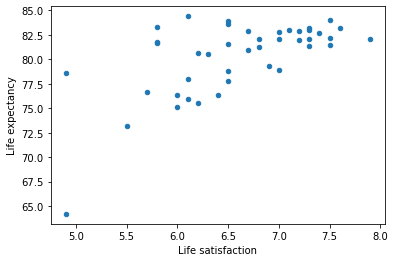

In [24]:
import matplotlib.pyplot as plt

oecd_bli_sample = oecd_bli[['Life satisfaction', 'Life expectancy']].dropna()
oecd_bli_sample.head()

oecd_bli_sample.plot(kind="scatter", x="Life satisfaction", y="Life expectancy")
plt.show()


In [27]:
full_data = pd.merge(left=oecd_bli, right = gdp2020, on="Country")
full_data.head()

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per cap (USD)
Country,,,,,,,,,,,,,,,,,,,,,
Australia,6.7,NaN,84.0,12.5,73.0,67.0,0.9,37433.0,528768.0,19.4,...,93.0,NaN,85.0,2.7,499.0,14.36,92.0,92.0,20.0,48678.683594
Austria,12.2,0.8,86.0,5.3,72.0,86.0,0.5,37001.0,309637.0,20.8,...,92.0,1.6,71.0,1.3,491.0,14.51,76.0,92.0,17.0,51857.691406
Belgium,12.8,0.7,80.0,4.3,65.0,56.0,1.1,34884.0,447607.0,20.0,...,90.0,2.1,74.0,2.0,500.0,15.52,88.0,79.0,19.0,48769.726562
Brazil,11.7,6.7,57.0,5.6,57.0,45.0,19.0,NaN,NaN,NaN,...,83.0,NaN,NaN,2.2,400.0,NaN,80.0,70.0,16.0,14063.982422
Canada,7.1,0.2,92.0,3.3,70.0,78.0,1.2,34421.0,478240.0,22.9,...,93.0,2.6,89.0,2.9,517.0,14.57,68.0,90.0,17.0,46064.253906


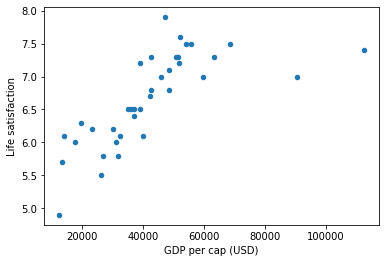

In [32]:
full_data.plot(kind='scatter', x='GDP per cap (USD)', y='Life satisfaction')
plt.show()